In [ ]:
#copied mainly from https://scikit-learn.org/stable/modules/naive_bayes.html

In [4]:
#see https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import math

dataset_type = 'none'
while dataset_type not in {'iris', 'cancer', 'digits'}:
  dataset_type = input('Enter iris for the Iris dataset and cancer for the Breast Cancer dataset ')
  if dataset_type not in {'iris', 'cancer', 'digits'}:
    print("Invalid response: '%s', Response must be only iris or cancer or digits. Please try again." % dataset_type)


Enter iris for the Iris dataset and cancer for the Breast Cancer dataset digits


In [5]:
if dataset_type == 'iris': 
  the_data = datasets.load_iris() #get the data from sklearn
  print("Iris data set selected")
elif dataset_type == 'cancer': 
  the_data = datasets.load_breast_cancer() #get the data from sklearn
  print("Cancer data set selected")
else: 
  the_data = datasets.load_digits() #get the data from sklearn
  print("Digits data set selected")


Digits data set selected


In [ ]:
print("\nThe Entire Dataset \n", the_data) 


The Entire Dataset 
 {'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixe

In [6]:
# the_data is an extension of the distionary data type into a sklearn type called bunch.  The Iris data is a dictionary data type.  
# The dicitionay has the following key -> values: 
# 'data': array n x 4 of 4 lengths
# 'target': array n x 1 of target classes with values 0, 1, or 2
# 'target_names': array for the 3 names of iris species values or array (['setosa', 'versicolor', 'virginica'], dtype='<U10')
# 'feature_names': list of 4 feature names.  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# 'frame': ... 
# 'DESCR': ... 
# 'filename': 'iris.csv'
# 'data_module': ... 
label_names = the_data['target_names']
feature_names = the_data['feature_names']
all_labels = the_data['target']
all_features = the_data['data']
# Looking at our data
print("\n the_data data type: ", type(the_data))
print("Feature Names: \n", feature_names)
print("\nTarget Label Names: \n", label_names)
print("\nfeatures data type: ", type(all_features))
print("\nAll Features in the data: \n", all_features)
print("\nAll Labels in the data: \n", all_labels)


 the_data data type:  <class 'sklearn.utils.Bunch'>
Feature Names: 
 ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']

Target Label Names: 
 [0 1 2 3 4 5 6 7 8 9]

features data type:  <class 'numpy.ndarray'>

All F

In [7]:
#see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
# Spliting our dataset into 2 parts for training and testing
training_features, testing_features, training_labels, testing_labels = train_test_split(all_features,all_labels,test_size=0.2,random_state=0)
# print("\nTraining features: \n", training_features)
# print("\nTraining Labels: \n", training_labels) 
# print("\nTesting Labels: \n", testing_labels) 
normalize = "none"
while normalize not in {'Y', 'N'}:
  normalize = input("Do you want to normalize the data (Y/N) ")
  if normalize == 'Y':
    scaler = StandardScaler()
    model = scaler.fit(training_features)
    training_features = model.transform(training_features)
    testing_features = model.transform(testing_features)
  elif normalize != 'N':
    print("Invalid response: '%s', Response must be only Y or N. Please try again.  " % dataset_type)


Do you want to normalize the data (Y/N) Y


In [8]:
# Training our Classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB() #classifier is now an object of the Gaussian Naive Bayes class
model = classifier.fit(training_features,training_labels)  
predicted_labels = model.predict(testing_features) #use the model obtained in previous step to predict labels for testing features

In [9]:
print ("\nPredicted class labels: \n", predicted_labels)
print("\nCorrect Testing class labels: \n", testing_labels)
print("\nPredicted Class Names: \n", label_names[predicted_labels])
print("\nCorrect Class Names: \n", label_names[testing_labels])


Predicted class labels: 
 [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 7 7 5 7 9 2 9 4 7 6 1 9 4 3
 1 0 1 1 6 7 7 1 0 7 6 3 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 8 6 8 1 1 3 5 1
 2 1 8 1 9 7 1 3 6 0 5 3 7 5 1 8 9 9 3 1 7 7 4 1 5 1 5 5 8 5 8 0 7 1 7 7 3
 7 8 9 7 7 8 1 6 5 8 5 5 4 1 7 0 6 8 5 8 1 1 5 9 9 5 7 5 6 8 8 6 7 6 1 5 1
 7 9 9 1 5 3 6 1 8 9 7 7 6 7 6 5 6 0 8 7 3 8 6 1 0 7 1 6 3 8 6 7 4 1 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 1 9 6 4 7 0 1 7 6 1 3 8 0 9 5 3 1 1 4 1 1 6 1 9 1 4
 8 3 7 6 8 3 3 1 6 9 8 6 3 1 2 0 7 6 1 1 8 7 1 7 1 5 5 7 5 8 8 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 7 6 3 1 6 1 8 8 4 6 7 5 2 1 7 3 8 4 6 9 4 5 7 3
 4 6 2 8 0 1 7 8 0 1 6 0 4 8 0 7 7 7 5 7 8 2 8 7 3 7 2 6 7 1 1 1 0 8 2 8 8
 5 6 8 3 7 8 1 5 1 6 6 5 0 9 4 1 1 7 0 8 9 0 5 7 8 1 8]

Correct Testing class labels: 
 [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 

In [10]:
print ("Test data where predicted label equals the test label: \n", testing_labels == predicted_labels)
number_correct = (testing_labels == predicted_labels).sum()
print ("\nNumber of correct predictions: %d. Out of total test cases %d." %(number_correct, testing_labels.shape[0]) )

Test data where predicted label equals the test label: 
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True  True  True  True False  True  True
  True  True  True  True False  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False  True False  True
  True  True  True False False False  True  True False  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True False  True False  True  True False  True False  True  True  True
 False  True  True False  True  True  True False  True False  True  True
 False  True False  True False  True  True  True False  True False False
 False  True  True  True  True  True  True  True False  True  True False
  True  True  True  True False  True  True  True  True  True  True 

In [11]:
from sklearn.metrics import accuracy_score
# Calculating the % Accuracy of the prediction. For Iris dataset random_state = 0 gives 97%, random_state 40 gives 100%, random_state 5 gives 90%. 
accuracy_percent = 100*accuracy_score(testing_labels,predicted_labels)
print("Prediction Accuracy : %5.2f%%" % accuracy_percent) #%% escapes the formatting % to print '%'

Prediction Accuracy : 77.78%


In [12]:
from sklearn.neighbors import KNeighborsClassifier
neighbor_size = []
errors_list = []
for k in range (2, 20): 
  classifier = KNeighborsClassifier(n_neighbors = k)
  model = classifier.fit(training_features,training_labels)  # or can also use:   predicted_labels = classifier.fit(train_features,train_labels) 
  predicted_labels = model.predict(testing_features) #use the model obtained in previous step to predict labels for testing features
  accuracy_percent = 100*accuracy_score(testing_labels,predicted_labels)
  # Calculating the % Accuracy of the prediction. 
  print("Prediction Accuracy for k = %2d : %5.2f%%" % (k, accuracy_percent)) #%% escapes the formatting % to print '%'
  neighbor_size.append(k)
  errors_list.append(100-accuracy_percent)

print (" K = ", neighbor_size, "\n", "Errors = ", errors_list)

Prediction Accuracy for k =  2 : 96.67%
Prediction Accuracy for k =  3 : 96.67%
Prediction Accuracy for k =  4 : 96.11%
Prediction Accuracy for k =  5 : 96.94%
Prediction Accuracy for k =  6 : 96.67%
Prediction Accuracy for k =  7 : 96.94%
Prediction Accuracy for k =  8 : 96.67%
Prediction Accuracy for k =  9 : 96.94%
Prediction Accuracy for k = 10 : 96.11%
Prediction Accuracy for k = 11 : 96.67%
Prediction Accuracy for k = 12 : 96.39%
Prediction Accuracy for k = 13 : 96.67%
Prediction Accuracy for k = 14 : 96.94%
Prediction Accuracy for k = 15 : 96.39%
Prediction Accuracy for k = 16 : 96.39%
Prediction Accuracy for k = 17 : 95.83%
Prediction Accuracy for k = 18 : 95.56%
Prediction Accuracy for k = 19 : 95.56%
 K =  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] 
 Errors =  [3.3333333333333286, 3.3333333333333286, 3.8888888888888857, 3.055555555555557, 3.3333333333333286, 3.055555555555557, 3.3333333333333286, 3.055555555555557, 3.8888888888888857, 3.3333333333333286,

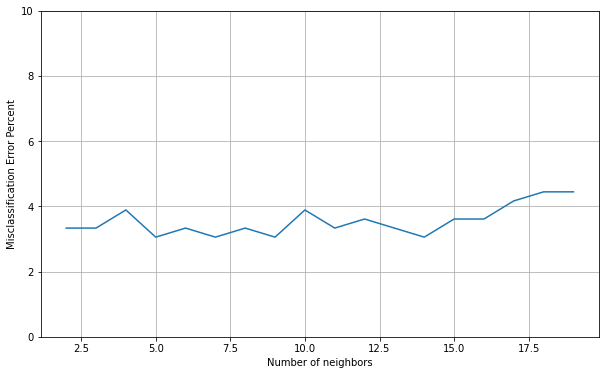

In [13]:
# plot misclassification error versus k
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6 ))
plt.plot(neighbor_size, errors_list) #x list and y list
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error Percent')
plt.ylim((0,10))
plt.grid(True)
plt.show()

In [14]:
from sklearn.model_selection import cross_val_score
# perform k-fold cross validation
neighbor_size = [] #value of k used
errors_list = [] #accuracy for k used
num_folds = 5 #number of folds in k-fold. Usually 5 is a good number. 
for k in range (2, 20): 
    classifier = KNeighborsClassifier(n_neighbors = k)
    #try the experiment, splitting data into num_fold folds, with 1 fold as test set 
    scores = cross_val_score(classifier, all_features, all_labels, cv = num_folds, scoring = 'accuracy') 
    print("scores = ", scores, "average = ", scores.mean())
    accuracy_percent = 100*scores.mean() #use the mean of the cv = num_folds scores as accuracy. 
    neighbor_size.append(k)
    errors_list.append(100-accuracy_percent)

print (" K = ", neighbor_size, "\n", "Error Percent = ", errors_list)

scores =  [0.96111111 0.96666667 0.96935933 0.97771588 0.96100279] average =  0.9671711544413494
scores =  [0.95555556 0.95833333 0.96657382 0.98607242 0.96657382] average =  0.966621788919839
scores =  [0.94722222 0.95833333 0.96657382 0.98050139 0.96657382] average =  0.9638409161250386
scores =  [0.94722222 0.95555556 0.96657382 0.98050139 0.9637883 ] average =  0.9627282575054161
scores =  [0.94444444 0.95833333 0.96657382 0.97493036 0.95264624] average =  0.9593856391210152
scores =  [0.93611111 0.96111111 0.96935933 0.98050139 0.95264624] average =  0.9599458372021046
scores =  [0.93611111 0.95833333 0.96935933 0.97771588 0.94986072] average =  0.9582760755184154
scores =  [0.93055556 0.95277778 0.97214485 0.97771588 0.94986072] average =  0.9566109563602601
scores =  [0.93055556 0.94722222 0.96935933 0.97771588 0.94986072] average =  0.954942742185082
scores =  [0.93611111 0.94444444 0.96935933 0.97771588 0.94986072] average =  0.9554982977406375
scores =  [0.93611111 0.95277778

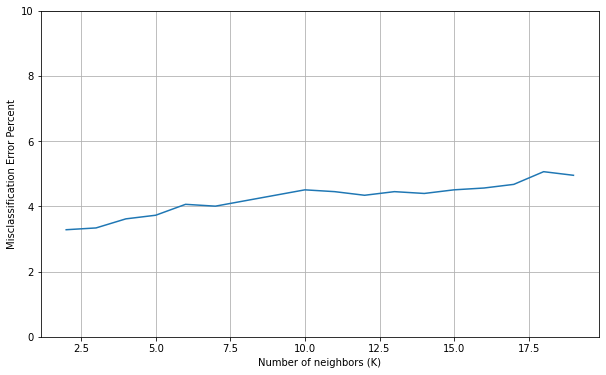

In [15]:
# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbor_size, errors_list) #x list and y_list
plt.xlabel('Number of neighbors (K)')
plt.ylabel('Misclassification Error Percent')
plt.ylim((0,10))
plt.grid(True)
plt.show()

In [16]:
  best_k = 0
  best_accuracy = 0
  for k in range(1, math.ceil(math.sqrt(len(training_labels)))):
    classifier = KNeighborsClassifier(n_neighbors = k)
    model = classifier.fit(training_features,training_labels)  # or can also use:   predicted_labels = classifier.fit(train_features,train_labels) 
    predicted_labels = model.predict(testing_features) #use the model obtained in previous step to predict labels for testing features
    accuracy_percent = 100*accuracy_score(testing_labels,predicted_labels)
    if best_accuracy < accuracy_percent:
      best_k = k
      best_accuracy = accuracy_percent
      if best_accuracy == 100:
        break
  
  print("Best accuracy percent for KNN with k =%2d is %5.2f" %(best_k, best_accuracy))

Best accuracy percent for KNN with k = 5 is 96.94
